In [40]:
import pandas as pd

# Load dataset
df = pd.read_csv('random_batch_18_nov_2020.csv')

# Display the head
df.head()

,repo_name,commit,message,Is_Refactor,Is_Perfective,Is_Adaptive,Is_Corrective,Justification,Comment,Certain,Sampling,Is_English,Is_Abstraction,Is_Performance,Is_Positive_Sentiment,Is_Negative_Sentiment,Is_Security,Is_Swearing
0,pymor/dune-gdt,b0c1b7037681ded5b3409fdbb9f18902684e92d9,[pylicense] add .tpl to config bump copyright ...,False,True,False,FALSE,"add, bump copyright",NaN,NaN,random_batch_18_nov_2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,wso2/carbon-analytics,ddcea4897ac24c0f71469cc5ed4846dcfe23585f,Added missing iterator\n,False,False,False,TRUE,add missing,NaN,NaN,random_batch_18_nov_2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,root-mirror/root,e41c550e9371bc246a66df25edd02fec109d67b0,win32gdk source files.\n\n\ngit-svn-id: acec3f...,False,False,False,FALSE,NaN,NaN,FALSE,random_batch_18_nov_2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,yuanming-hu/taichi,1bd17f6f1507a07b1a8896511642f72eac19843b,removed all return values of runtime initializ...,False,False,False,FALSE,removed,NaN,NaN,random_batch_18_nov_2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,otwcode/otwarchive,f96a19672775cc67940c99e5a0a3043b97a1ee29,Merge pull request #988 from tuff-ghost/issue_...,True,True,False,FALSE,rewrite,NaN,NaN,random_batch_18_nov_2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Preprocessing - Column Dropping

# Columns to drop:
    # repo_name and commit:
        # Reason: They are just identifiers and don’t provide meaningful information
    # Is_Abstraction, Is_Performance, Is_Positive_Sentiment, Is_Negative_Sentiment, Is_Security, Is_Swearing:
        # Reason: They are secondary attributes, sparsely populated and likely not very useful
    # Comment, Certain, Justification, Is_English, Sampling:
        # Reason: They are not useful and most of their rows are missing 

# Columns to keep:
    # message
        # Reason: for obvious reasons
    # Is_Refactor, Is_Perfective, Is_Adaptive, Is_Corrective:
        # Reason: They are the primary targets

label_columns = ['Is_Refactor', 'Is_Perfective', 'Is_Adaptive', 'Is_Corrective']

columns_to_drop = ['repo_name', 'commit', 'Is_Abstraction', 'Is_Performance', 'Is_Positive_Sentiment', 'Is_Negative_Sentiment', 'Is_Security', 'Is_Swearing', 'Comment', 'Certain', 'Justification', 'Is_English', 'Sampling']

df = df.drop(columns_to_drop, axis=1)
df = df.dropna(axis=0, subset=['message'])
df = df.drop_duplicates(subset=['message'])

# Convert True and False to 1 and 0, handle case differences and whitespace
for col in label_columns:
    df[col] = df[col].apply(lambda x: 1 if str(x).strip().lower() == 'true' 
                            else 0 if str(x).strip().lower() == 'false' 
                            else pd.NA)

# Confirm
df.head()

,message,Is_Refactor,Is_Perfective,Is_Adaptive,Is_Corrective
0,[pylicense] add .tpl to config bump copyright ...,0,1,0,0
1,Added missing iterator\n,0,0,0,1
2,win32gdk source files.\n\n\ngit-svn-id: acec3f...,0,0,0,0
3,removed all return values of runtime initializ...,0,0,0,0
4,Merge pull request #988 from tuff-ghost/issue_...,1,1,0,0


In [44]:
# Preprocessing - Tokenizization, Lemmatization, Removing Stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove special characters
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    # Tokenize the text into words
    tokens = word_tokenize(text)
    # Remove common stopwords that don't add value
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize to reduce words to their base forms
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

# Apply preprocessing to the message column
df['message'] = df['message'].apply(preprocess_text)

# Confirm
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ahmet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ahmet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ahmet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ahmet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,message,Is_Refactor,Is_Perfective,Is_Adaptive,Is_Corrective
0,pylicense add tpl config bump copyright year,0,1,0,0
1,added missing iterator,0,0,0,1
2,win32gdk source file gitsvnid acec3fd5b7ea1eb9...,0,0,0,0
3,removed return value runtime initialization fu...,0,0,0,0
4,merge pull request 988 tuffghostissue3380 3380...,1,1,0,0


In [46]:
# Separate labeled and unlabeled data
labeled_df = df.dropna(subset=label_columns, how='all')  # At least one label is present
labeled_df = labeled_df.dropna(subset=label_columns, how='any')  # Drop mixed labels, where some of the labels are NaN but others are filled

unlabeled_df = df[df[label_columns].isna().all(axis=1)]  # Completely unlabeled data

# Confirm separation
print("Labeled Data:", labeled_df.shape)
print("Unlabeled Data:", unlabeled_df.shape)

Labeled Data: (1379, 5)
Unlabeled Data: (3558, 5)


In [48]:
# Text Augmentation
from nlpaug.augmenter.word import SynonymAug
import nltk
nltk.download('averaged_perceptron_tagger_eng')

# Initialize the augmenter for synonym replacement using WordNet
augmenter = SynonymAug(aug_src='wordnet')

# Augmenting the commit messages to artificially expand the dataset
augmented_messages = labeled_df['message'].apply(lambda x: augmenter.augment(x))

# Create a new DataFrame for the augmented data
augmented_df = labeled_df.copy()
augmented_df['message'] = augmented_messages

# Combine the original and augmented datasets
labeled_df = pd.concat([labeled_df, augmented_df], ignore_index=True)

print(f"Dataset size after augmentation: {len(labeled_df)}")

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\ahmet\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


Dataset size after augmentation: 2758


In [50]:
# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure all messages are strings before vectorizing
labeled_df['message'] = labeled_df['message'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Vectorize the messages using TF-IDF
tfidf = TfidfVectorizer(max_features=2000, ngram_range=(1, 2))  
X = tfidf.fit_transform(labeled_df['message'])
y = labeled_df[label_columns]

In [52]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Random forest
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import numpy as np

y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Initializing a Random Forest model within a One-vs-Rest framework
# OneVsRest wrapper is needed to decompose the multilabel classification into binary ones for each label.
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
clf.fit(X_train, y_train)

y_pred_probs = clf.predict_proba(X_test)

# Threshold tuning for maximum F1 score
best_threshold = 0.5
best_f1 = 0

# Testing thresholds from 0.1 to 0.9
for threshold in np.arange(0.1, 1.0, 0.1):
    y_pred = (y_pred_probs >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred, average="weighted")
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}, Best F1-Score: {best_f1}")

Best Threshold: 0.30000000000000004, Best F1-Score: 0.7298903132699046


In [56]:
# After threshold tuning, we've found that 0.3 is the best one, so we are applying that
y_pred_optimized = (clf.predict_proba(X_test) >= 0.3).astype(int)

# Evaluate the performance
print(classification_report(y_test, y_pred_optimized, target_names=label_columns))

               precision    recall  f1-score   support

  Is_Refactor       0.78      0.72      0.75        88
Is_Perfective       0.71      0.81      0.76       151
  Is_Adaptive       0.61      0.60      0.60       141
Is_Corrective       0.79      0.87      0.82       127

    micro avg       0.71      0.75      0.73       507
    macro avg       0.72      0.75      0.73       507
 weighted avg       0.71      0.75      0.73       507
  samples avg       0.54      0.56      0.54       507



C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [58]:
from sklearn.metrics import f1_score, precision_score, recall_score, hamming_loss

f1 = f1_score(y_test, y_pred_optimized, average="weighted")
precision = precision_score(y_test, y_pred_optimized, average="weighted")
recall = recall_score(y_test, y_pred_optimized, average="weighted")
hamming = hamming_loss(y_test, y_pred_optimized)

print("Random Forest with TDIDF Metrics:")
print(f"F1-Score: {f1}, Precision: {precision}, Recall: {recall}, Hamming: {hamming}")

Random Forest with TDIDF Metrics:
F1-Score: 0.7294902128811895, Precision: 0.7112005540387503, Recall: 0.7514792899408284, Hamming: 0.12681159420289856


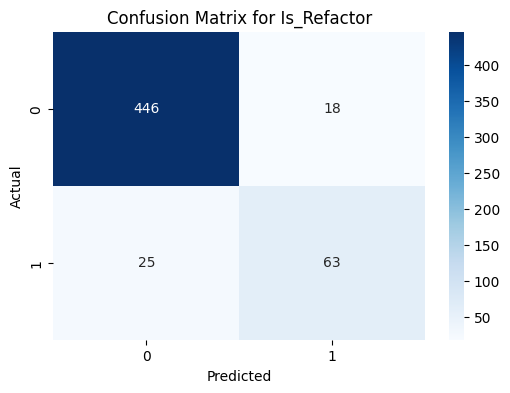

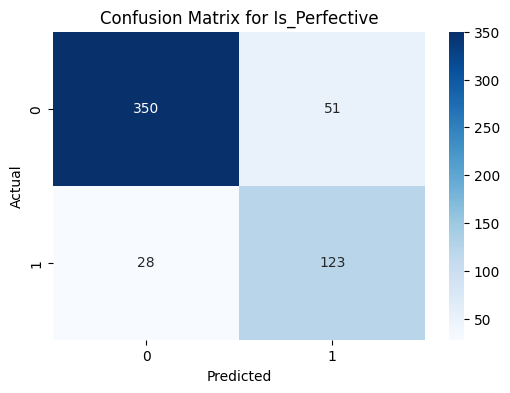

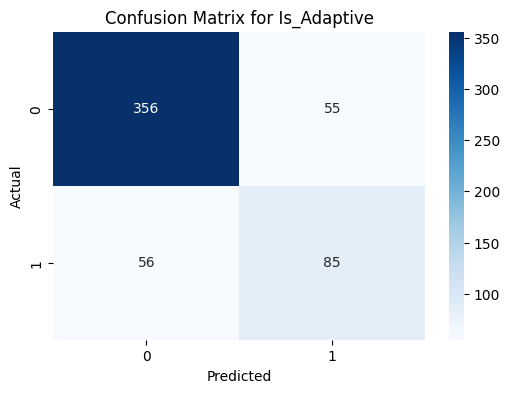

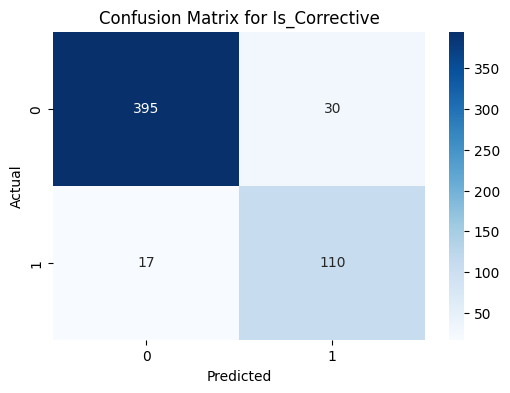

In [64]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_test_np = np.array(y_test)
y_pred_optimized_np = np.array(y_pred_optimized)

# Plot confusion matrix for each label
for i, label in enumerate(label_columns):
    cm = confusion_matrix(y_test_np[:, i], y_pred_optimized_np[:, i])  # Use numpy slicing
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title(f'Confusion Matrix for {label}')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

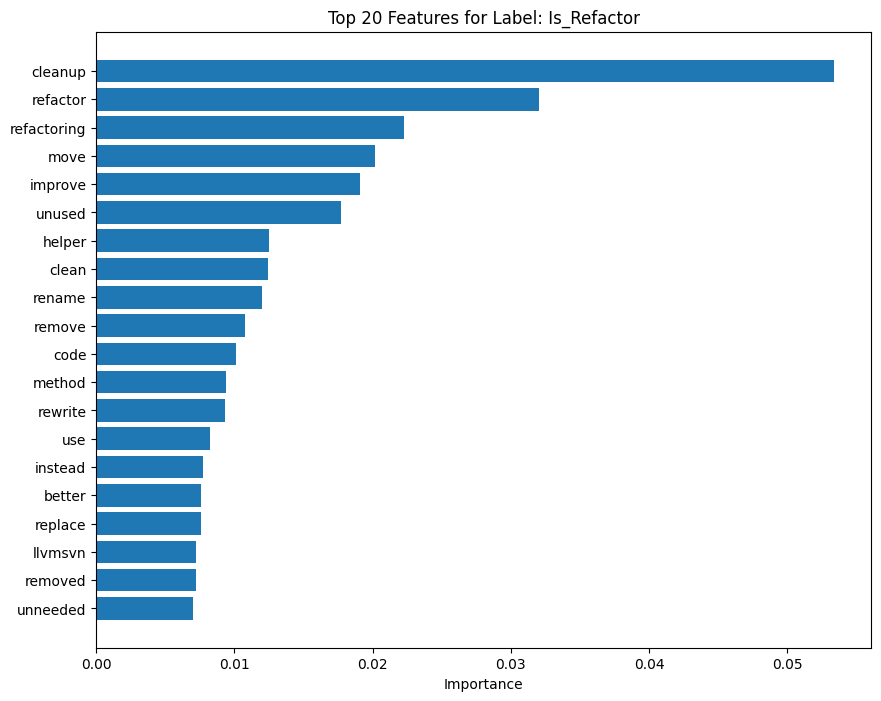

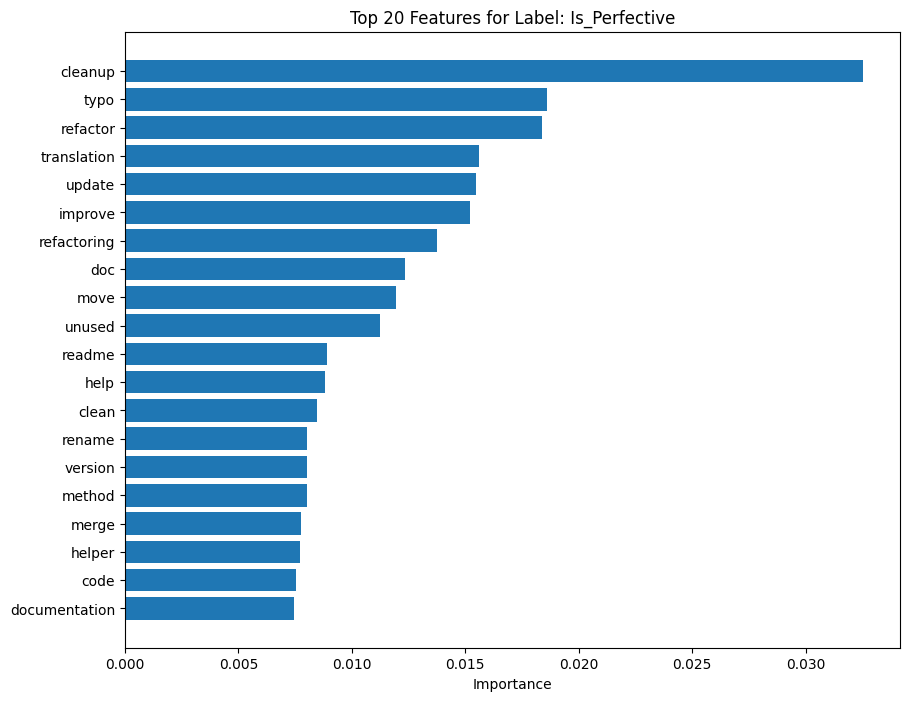

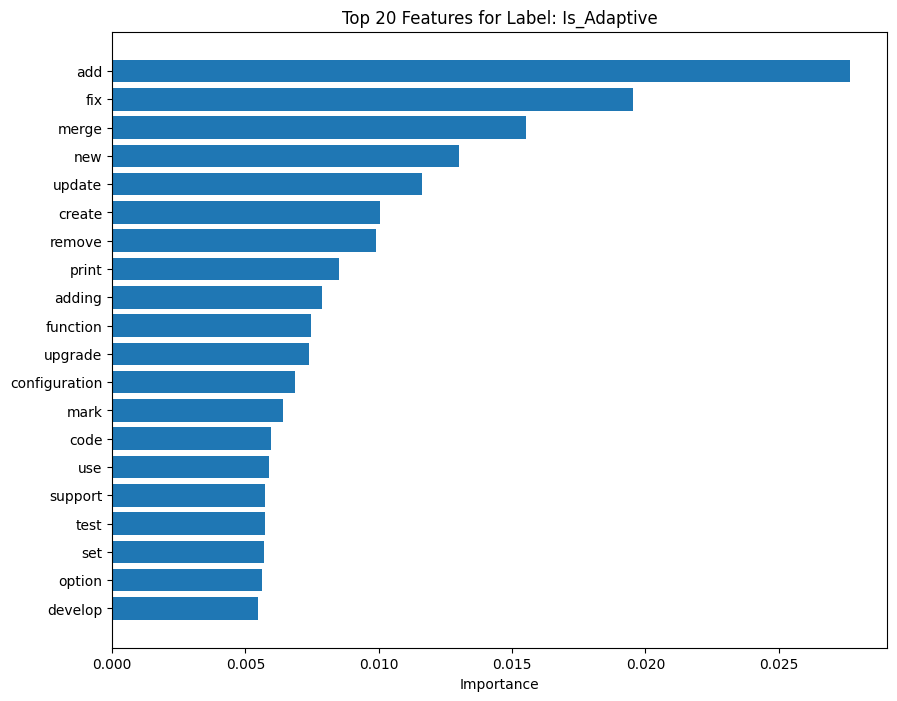

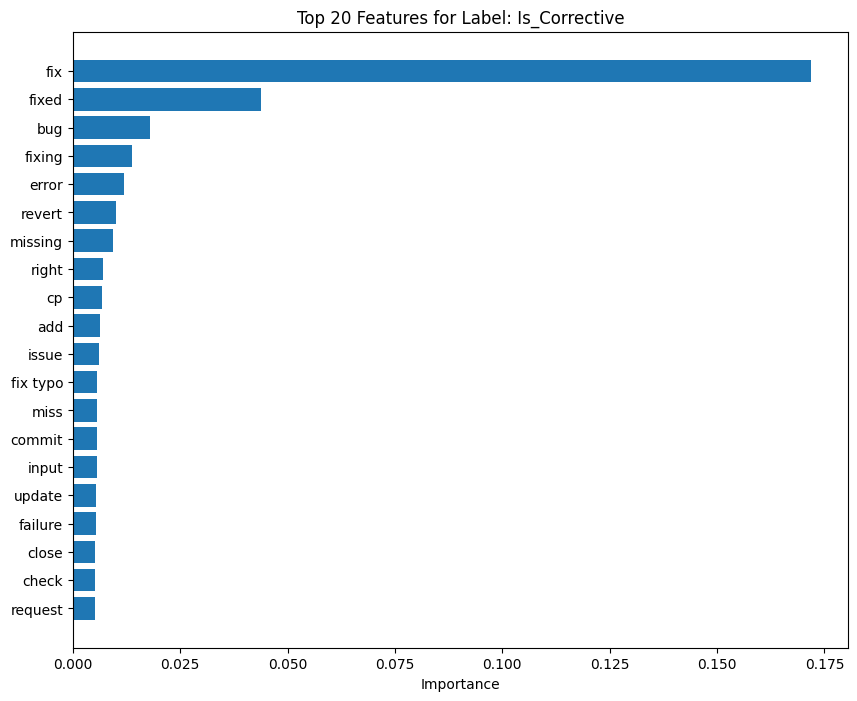

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Access feature importances for each label
for i, label in enumerate(label_columns):
    rf = clf.estimators_[i]  
    feature_importances = rf.feature_importances_
    features = tfidf.get_feature_names_out()  # Get feature names from TF-IDF

    # Create a DataFrame for the top features
    importance_df = pd.DataFrame({
        "Feature": features,
        "Importance": feature_importances
    }).sort_values(by="Importance", ascending=False).head(20)

    # Plot top 20 features for this label
    plt.figure(figsize=(10, 8))
    plt.barh(importance_df["Feature"], importance_df["Importance"])
    plt.gca().invert_yaxis()
    plt.xlabel("Importance")
    plt.title(f"Top 20 Features for Label: {label}")
    plt.show()

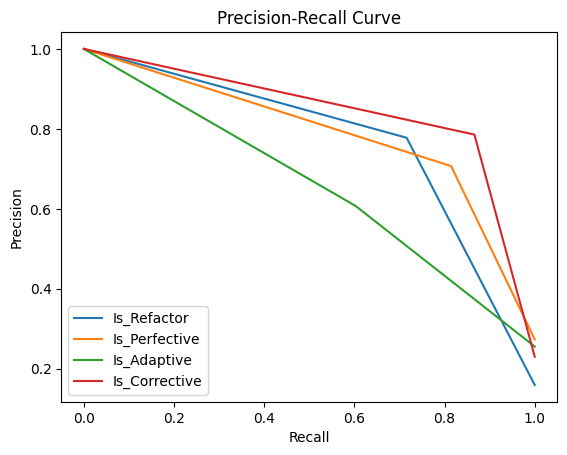

In [70]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

y_test_np = np.array(y_test)
y_pred_optimized_np = np.array(y_pred_optimized)

# Plot Precision-Recall curves for each label
for label_idx, label in enumerate(label_columns):
    # Compute precision and recall for the current label
    precision, recall, thresholds = precision_recall_curve(
        y_test_np[:, label_idx], y_pred_optimized_np[:, label_idx]
    )
    plt.plot(recall, precision, label=f'{label}')

# Add labels and legend
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()